Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    url = 'https://cdn.theforage.com/vinternships/companyassets/Sj7temL583QAYpHXD/JiwEkbBq8pFwMRYLc/1639459341617/transactions.csv'
    # read the CSV file
    return pd.read_csv(url)
     

def exercise_1(df):
    return df.columns.tolist()
     

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique().tolist()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    
    distinct_destinations_per_source = df.groupby('nameOrig').agg(DistinctDestinations=('nameDest', 'nunique')).reset_index()
    return   distinct_destinations_per_source.sort_values(by='DistinctDestinations', ascending=False)

def visual_1(df):
    def transaction_counts(df):
        # TODO
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        # TODO
         return df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Bar Chart')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Count')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Split by Fraud Bar Chart')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')
    fig.suptitle('Transaction Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The Transaction Types Bar Chart provides a visual representation of the frequency of different transaction types. It helps in understanding the distribution of transaction types in the dataset. The Transaction Types Split by Fraud Bar Chart extends this analysis by showing the frequency of transaction types categorized by whether fraud was detected or not. This comparison helps in identifying patterns and anomalies in fraudulent transactions compared to legitimate ones.'

def visual_2(df):
    def query(df):
        # TODO
        return df[(df['type'] == 'CASH_OUT')]
    plot = query(df).plot.scatter(x='oldbalanceOrg', y='oldbalanceDest')
    plot.set_title('Scatter Plot of Origin vs. Destination Account Balance Delta for Cash Out Transactions')
    plot.set_xlabel('Origin Account Balance Delta')
    plot.set_ylabel('Destination Account Balance Delta')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'This scatter plot visualizes the relationship between the changes in origin and destination account balances for Cash Out transactions. Each point represents a transaction, with the x-coordinate indicating the change in the origin account balance and the y-coordinate indicating the change in the destination account balance. This plot can help in identifying any patterns or outliers in the balance changes during Cash Out transactions.'

def exercise_custom(df):
   # Filter for fraud transactions
    fraud_transactions = df[df['isFraud'] == 1]
    # Group by transaction type and sum the amount for fraud transactions
    fraud_transactions_amount = fraud_transactions.groupby('type')['amount'].sum()
    return fraud_transactions_amount
    
def visual_custom(df):
    fraud_transactions_amount = exercise_custom(df)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the bar chart
    fraud_transactions_amount.plot(kind='bar', ax=ax)
    
    ax.set_title('Total Amount of Fraud Transactions by Type')
    ax.set_xlabel('Transaction Type')
    ax.set_ylabel('Total Amount')
    
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    plt.show()
    
    return 'This bar chart visualizes the total amount of fraud transactions for each transaction type. It helps in identifying which types of transactions are more prone to fraudulent activities in terms of the total amount of money involved.'

In [70]:
exercise_1

<function __main__.exercise_1(df)>

In [71]:
exercise_2

<function __main__.exercise_2(df, k)>

In [72]:
exercise_3

<function __main__.exercise_3(df, k)>

In [73]:
exercise_4

<function __main__.exercise_4(df)>

In [74]:
exercise_5

<function __main__.exercise_5(df)>

In [75]:
exercise_6

<function __main__.exercise_6(df)>

In [76]:
exercise_7

<function __main__.exercise_7(df)>

'The Transaction Types Bar Chart provides a visual representation of the frequency of different transaction types. It helps in understanding the distribution of transaction types in the dataset. The Transaction Types Split by Fraud Bar Chart extends this analysis by showing the frequency of transaction types categorized by whether fraud was detected or not. This comparison helps in identifying patterns and anomalies in fraudulent transactions compared to legitimate ones.'

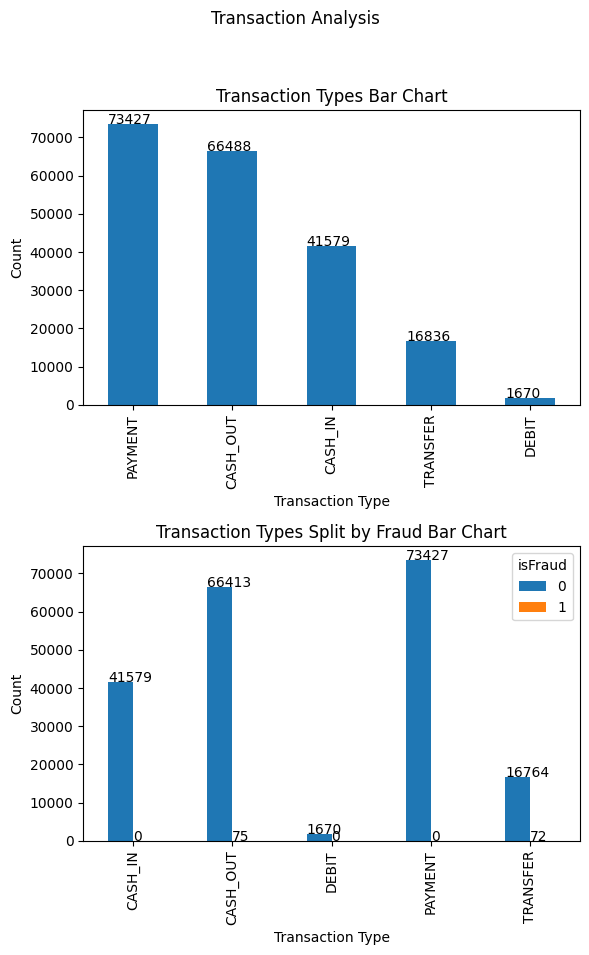

In [77]:
visual_1(df)

'This scatter plot visualizes the relationship between the changes in origin and destination account balances for Cash Out transactions. Each point represents a transaction, with the x-coordinate indicating the change in the origin account balance and the y-coordinate indicating the change in the destination account balance. This plot can help in identifying any patterns or outliers in the balance changes during Cash Out transactions.'

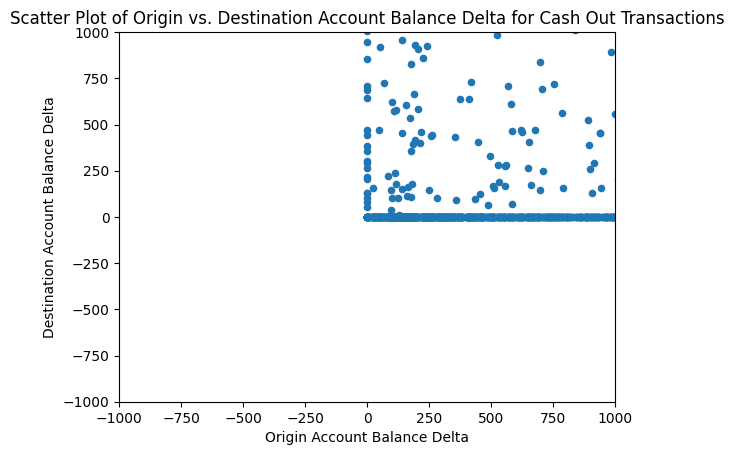

In [78]:
visual_2(df)

In [79]:
fraud_transactions_amount = exercise_custom(df)

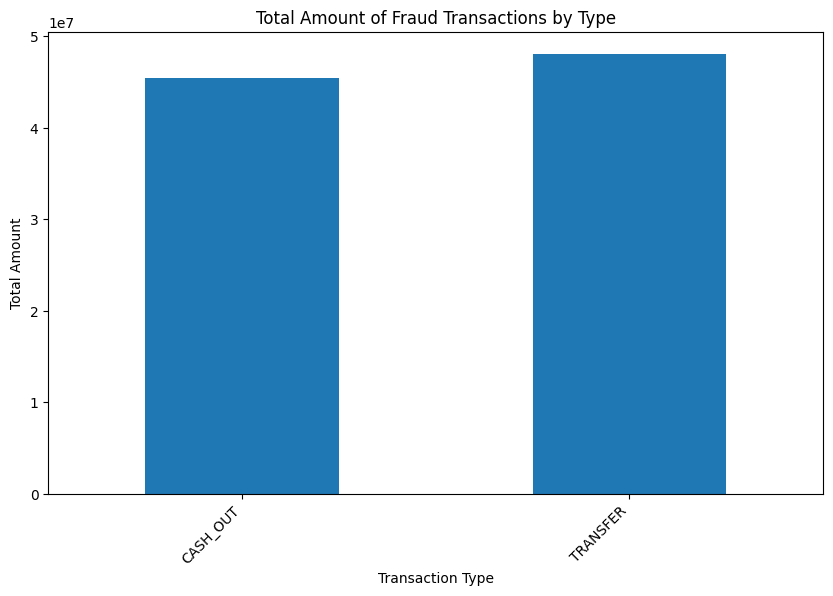

'This bar chart visualizes the total amount of fraud transactions for each transaction type. It helps in identifying which types of transactions are more prone to fraudulent activities in terms of the total amount of money involved.'

In [80]:
visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.